# 📡 Имитационное моделирование RFID системы в зависимости от параметра `Q` и количества меток в зоне чтения

В данном блокноте проводится имитацинное моделирование RFID системы для изучения зависимости вероятности чтения банка памяти `USER` от параметра, количества меток в зоне чтения, количества коллизий. Также изучается работа команды QueryAdjust и алгоритма коррекции `Q`

### Импорт необходимых модулей

In [1]:
import numpy as np

from pysim.experiments.utility.rfid_sim import calculate_probs, plot_probs
from pysim.models.rfid.params import default_params, inner_params

In [2]:
IMG_DIRECTORY = "rfid/multiple_tag"
JSON_DIRECTORY = "result_jsons/rfid/multiple_tag/"

### ⚙️ Общие параметры для разных кривых

In [3]:
q_variable = np.arange(0, 16, 1)
coding_params = [
    {'encoding': 'FM0', 'tari': 6.25},
    {'encoding': 'FM0', 'tari': 18.75},
    {'encoding': 'M2', 'tari': 12.5},
    {'encoding': 'M4', 'tari': 6.25},
    {'encoding': 'M8', 'tari': 25.0},
]

## 📈 Зависимость вероятности чтения банка памяти `USER` от значения параметра `Q` в случае без коллизий и без использования QueryAdjust

### ⚙️ Параметры для запуска моделирования

In [4]:
q_params_list = []
for coding_params_item in coding_params:
    q_params_list.append({
        'tari': coding_params_item['tari'],
        'encoding': coding_params_item['encoding'],
        'tid_word_size': default_params.tid_word_size,
        'power': default_params.power_dbm,
         # 'num_tags': default_params.num_tags,
        'num_tags': 50,
        'speed': default_params.speed,
        'reader_offset': default_params.reader_offset,
        'tag_offset': default_params.tag_offset,
        'altitude': default_params.altitude,
        'useadjust': default_params.useadjust,
    })

### 💾 Получение результатов

In [5]:
key_name = lambda params: f"M = {params['encoding']}, Tari = {params['tari']} мкс"

In [6]:
q_result = calculate_probs(
    variable="q",
    variable_values=q_variable,
    params_list=q_params_list,
    key_fn=key_name,
    use_json=True,
    save_results=False,
    json_directory=JSON_DIRECTORY,
    file_name="q.json"
)
# Моделирование на M3 Pro с 'num_tags': 200:
# Моделирование по переменной q: 100%|██████████| 5/5 [02:37<00:00, 31.41s/it]

Интервал генерации единственной метки: 1.0


### 🖼️ Построение графика

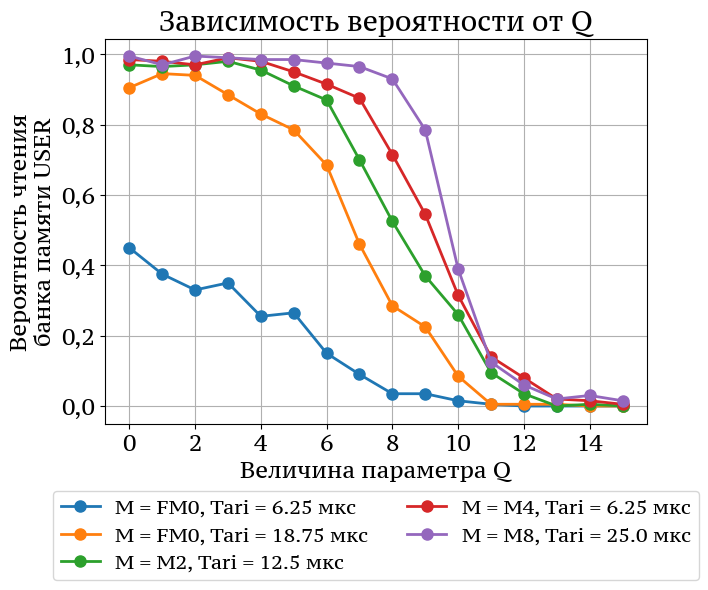

In [7]:
plot_probs(
    results_list=[q_result],
    labels_list=[key_name(params) for params in coding_params],
    titles=["Зависимость вероятности от Q"],
    x_variable=q_variable,
    x_label="Величина параметра Q",
    image_name="Collision probs",
    save_fig=False,
    image_directory=IMG_DIRECTORY,
    integer_labels=True
)

## 📈 Зависимость вероятности чтения банка памяти `USER` от значения параметра `Q` в случае **с коллизиями** и без использования QueryAdjust

In [8]:
inner_params.tag_params.generation_interval = (lambda: 0.01,)

In [9]:
q_result = calculate_probs(
    variable="q",
    variable_values=q_variable,
    params_list=q_params_list,
    key_fn=key_name,
    use_json=False,
    save_results=True,
    json_directory=JSON_DIRECTORY,
    file_name="q_collision.json"
)

Интервал генерации единственной метки: 0.001


Моделирование по переменной q: 100%|██████████| 5/5 [00:42<00:00,  8.49s/it]


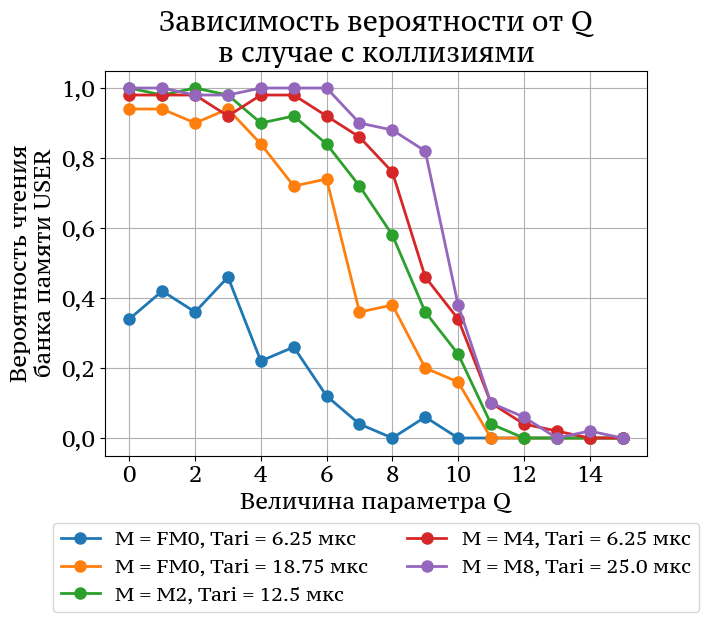

In [10]:
plot_probs(
    results_list=[q_result],
    labels_list=[key_name(params) for params in coding_params],
    titles=["Зависимость вероятности от Q\nв случае с коллизиями"],
    x_variable=q_variable,
    x_label="Величина параметра Q",
    image_name="Collision probs",
    save_fig=False,
    image_directory=IMG_DIRECTORY,
    integer_labels=True
)